# Solución propuesta de la Tarea 5

## Cadenas de Markov

> En cierto servicio, los clientes llegan a una tasa de a = 2 clientes/minuto. Es del interés de la administración procurar que no haya una cola de más de 5 personas el 95% del tiempo. Hay s "servidores", cada uno con una tasa de atención b (con un valor base de b = 1). Ambos s y b deben determinarse para cumplir con el objetivo indicado a partir de un presupuesto limitado de 100 markovs, donde markov es la moneda del problema. Actualmente hay solamente un servidor. Agregar un servidor más cuesta 30 markovs. Comprar una licencia de software para cada servidor, que duplica b, cuesta 20 markovs.

2. **(15 %) Determinar si es posible el objetivo planteado en las condiciones actuales (s = b = 1).**

Con $\rho = \lambda / (s \nu) = a/(sb) = 2$ no alcanza estacionaridad. Es necesario tener $\rho < 1$.

3. **(20 %) Con el presupuesto disponible, proponer una combinación s y b satisfactoria.**

Para tener $\rho = \lambda / (s \nu) = a/(sb) < 1$ y con *a* = 2, son posibles las siguientes combinaciones con el presupuesto disponible:

- s = 2, b = 2, $\rho = a/(sb) = 0.5 < 1$ (30 + 20 + 20 = 70 markovs)
- s = 3, b = 1, $\rho = a/(sb) = 0.66 < 1$ (30 + 30 = 60 markovs)
- s = 4, b = 1, $\rho = a/(sb) = 0.5 < 1$ (30 + 30 + 30 = 90 markovs)

Y es necesario corroborar si cumplen las especificaciones (una fila $L_q$ igual o menor a 5, al menos el 95% del tiempo). Para se utiliza el siguiente código, resultando que:

- s = 2, b = 2, $P_{L_q \leq 5}$ = 0.9947 > 0.95 (**sí cumple**)
- s = 3, b = 1, $P_{L_q \leq 5}$ = 0.9609 < 0.95 (**sí cumple**)
- s = 4, b = 1, $P_{L_q \leq 5}$ = 0.9972 > 0.95 (**sí cumple**)

In [4]:
import numpy as np
from math import factorial

# Parámetros de los flujos de entrada y salida
a = 2
b = 2

# Número de servidores
s = 2

# Número de clientes en fila "permitidos" máximo
fmax = 5

# Número de estado máximo (clientes en el sistema)
imax = fmax + s

# Parámetro ro
ro = a/(s*b)

# Probabilidad para i = 0
Psum = 0
for k in range(s):
    iteracion = (s*ro)**k / factorial(k)
    Psum += iteracion

P0 = (Psum + (s*ro)**s / (factorial(s)*(1 - ro)))**(-1)

# Probabilidad para i = [1, ..., imax]
Pi = np.zeros((imax))
for i in range(1, imax+1):
    if i < s:
        Pi[i-1] = P0 * (s*ro)**i / factorial(i)
    if i >= s:
        Pi[i-1] = P0 * s**s * ro**i / factorial(s)

# Probabilidad para i = [0, ..., imax]
Ptotal = P0 + sum(Pi)

# Resultados
print('Tasa de llegada: a =', a, 'solicitudes/minuto')
print('Tasa de servicio: b =', b, 'servicios/minuto')
print('Número de servidores: s =', s)
print('P0 =', P0)
print('Pi =', Pi)
print('La probabilidad de tener 5 o menos en fila es:', Ptotal)

Tasa de llegada: a = 2 solicitudes/minuto
Tasa de servicio: b = 2 servicios/minuto
Número de servidores: s = 2
P0 = 0.3333333333333333
Pi = [0.33333333 0.16666667 0.08333333 0.04166667 0.02083333 0.01041667
 0.00520833]
La probabilidad de tener 5 o menos en fila es: 0.9947916666666667


4. **(20 %) Diseñar una simulación para probar la propuesta anterior.**

(A partir de la simulación en `Py8`).

Se procede a probar los siguientes escenarios:

- s = 2, b = 2, $P_{L_q \leq 5}$ = 0.9947 > 0.95 (**sí cumple**)
- s = 3, b = 1, $P_{L_q \leq 5}$ = 0.9609 < 0.95 (**sí cumple**)
- s = 4, b = 1, $P_{L_q \leq 5}$ = 0.9972 > 0.95 (**sí cumple**)

Resultando (en unas simulaciones particulares, porque siempre da distinto):

- s = 2, b = 2, $P_{L_q \leq 5}^{\mathrm{sim}}$ = **0.9959** > 0.95 (sí cumple)
- s = 3, b = 1, $P_{L_q \leq 5}^{\mathrm{sim}}$ = **0.9755** > 0.95 (sí cumple)
- s = 4, b = 1, $P_{L_q \leq 5}^{\mathrm{sim}}$ = **0.9989** > 0.95 (sí cumple)

--- Resultados ---
Parámetro a = 2.0
Parámetro b = 1.0
Servidores s = 4
Tiempo con fila de menos de 5 solicitudes:
	 99.89%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.66 horas.


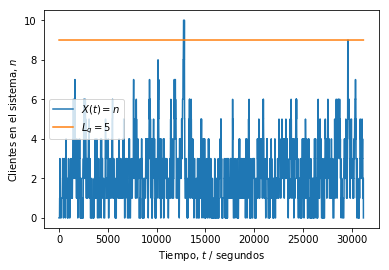

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Número de servidores
s = 4

# Parámetro de llegada (clientes/segundos)
lam = 2/60

# Parámetro de servicio (servicios/segundos)
nu = 1/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_inte = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_lleg = [t_inte[0]]
for i in range(1, len(t_inte)):
    siguiente = t_lleg[i-1] + t_inte[i]
    t_lleg.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_serv = np.ceil(Y.rvs(N)).astype('int')

# --- Inicio de modificaciones ---

# Inicialización del vector del estado de servidores
servidores = np.zeros(s)

# Inicialización del tiempo de inicio y fin de atención
inicio = t_lleg[0]  # primera llegada
fin = np.zeros(s)   # tiempos de fin de servicio para cada servidor

# Asignación (arbitraria) del primer servicio al primer servidor
aqui = 0                    # posición
servidores[aqui] = 1        # "ocupado"
fin[0] = inicio + t_serv[0] # primera salida (fin de servicio)

# -------
# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
# -------

# Inicialización del vector de tiempos de atención
t_aten = [inicio]

#print('---', 1, '--- t =', t_lleg[0], '--- servicio =', t_serv[0])
#print('Servidores: ', servidores)
#print('Final de servicio: ', fin)
#print('Posición de servicio:', aqui+1)

# Recorrer los clientes (del segundo al último)
for i in range(1, N): 
    # Recorrer cada servidor para actualizar estado
    for n in range(len(servidores)):
        if (t_lleg[i] > fin[n]):
            servidores[n] = 0 # está desocupado al momento de llegada
    # Revisar servidores desocupados
    if np.sum(servidores) < s:
        inicio = t_lleg[i] # atención inmediata
        aqui = np.where(servidores == 0)[0][0] # [0][0]: posición primer match
    else:
        inicio = np.min(fin).astype('int') + 1 # atención en el primer desocupado
        aqui = np.where(fin == np.min(fin))[0][0]
    # Actualizar tiempo de finalización 
    servidores[aqui] = 1
    fin[aqui] = inicio + t_serv[i]
    
    #print('---', i+1, '--- t =', t_lleg[i], '--- servicio =', t_serv[i])
    #print('Servidores: ', servidores)
    #print('Final de servicio: ', fin)
    #print('Posición de servicio:', aqui+1)
    
    # Tiempo de atención del i-ésimo cliente
    t_aten.append(inicio)

# -------
    
# Inicialización del vector temporal para registrar eventos
duracion = np.max(fin).astype('int') + 1
t = np.zeros(duracion)

# --- Fin de modificaciones ---

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_lleg[c]
    t[i] += 1
    j = t_aten[c] + t_serv[c]
    t[j] -= 1

# Máximo de clientes en fila
fmax = 5

# Umbral de más de nmax clientes en sistema
nmax = fmax + s

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
frecuencia = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] > nmax: 
        frecuencia += 1

# Fracción de tiempo con más de nmax solicitudes en sistema
fraccion = frecuencia / len(t)

# Resultados
print('--- Resultados ---')
print('Parámetro a =', str(lam*60))
print('Parámetro b =', str(nu*60))
print('Servidores s =', s)
print('Tiempo con fila de menos de {} solicitudes:'.format(fmax))
print('\t {:0.2f}%'.format(100 - 100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (nmax)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(fmax)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.show()